<a href="https://colab.research.google.com/github/good0neighbour/ESTCampAI/blob/main/Deeplearning/04_2_RNN_%EA%B3%84%EC%97%B4_%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 학습목표
- 시계열 데이터와 독립 데이터 간의 차이를 이해할 수 있음
- RNN 계열의 학습 원리를 이해할 수 있음

### char 단위(한 글자)로 학습하기
- 4개의 글자가 입력으로 들어가게 되면, 다섯 번째 글자를 맞추는 모델을 만들어보자

In [ ]:
import numpy as np

In [ ]:
# 5개의 샘플

X = np.array([
    [[1,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0]], # h, e, l, l
    [[0,0,0,0,1,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0]], # a, p, p, l
    [[1,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0]], # h, a, p, p
    [[0,0,0,0,0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,1,0,0,0]], # d, r, i, n
    [[1,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,1]] # h, o, u, s
])

# y데이터의 각 샘플은 1개의 글자로 이루어져 있음
y = np.array([[0,0,0,1,0,0,0,0,0,0,0,0,0,0],  # 'hell' -> 'o'
              [0,1,0,0,0,0,0,0,0,0,0,0,0,0],  # 'appl' -> 'e'
              [0,0,0,0,0,0,1,0,0,0,0,0,0,0],  # 'happ' -> 'y'
              [0,0,0,0,0,0,0,0,0,0,0,1,0,0],  # 'drin' -> 'k'
              [0,1,0,0,0,0,0,0,0,0,0,0,0,0]]) # 'hous' -> 'e'

In [ ]:
X.shape, y.shape
# 5개의 샘플
# 각 샘플은 4개의 글자로 이루어져 있음
# 각 글자는 14차원의 벡터로 표현되어 있음

((5, 4, 14), (5, 14))

### 모델링

In [ ]:
from tensorflow.keras import Sequential # 뼈대
from tensorflow.keras.layers import InputLayer, Dense, SimpleRNN # 층

# SimpleRNN : Keras에서 제공하는 기본 RNN 레이어

In [ ]:
# 1. 신경망 구조 설계

# 뼈대
model = Sequential()

# 입력층
model.add(InputLayer(shape = (4, 14))) # 데이터셋 내의 데이터 1개의 모양
# RNN 계열 같은 경우, 시퀀스 데이터를 처리하는 레이어
# 그래서 입력되는 데이터 모양은 (시퀀스 길이, 입력 특성의 차원)의 현태를 개대함

# 중간층 → RNN layer로 구성
model.add(SimpleRNN(units = 16)) # 활성화 함수 생략 (기본 : tanh)

# 출력층
model.add(Dense(14, activation = "softmax")) # 출력 모양은 14개의 차원(단어사전) → 다중분류

In [ ]:
# 2. 학습방법 설정
model.compile(
    loss = "categorical_crossentropy",
    # spares_categorical_crossentropy : y데이터 1차원인 경우
    # categorical_crossentropy y데이터 2차원인 경우
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [ ]:
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 2.5258
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0000e+00 - loss: 2.5008
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0000e+00 - loss: 2.4759
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0000e+00 - loss: 2.4511
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0000e+00 - loss: 2.4265
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2000 - loss: 2.4020
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2000 - loss: 2.3777
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4000 - loss: 2.3535
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4000 - loss: 2.3294
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4000 - loss: 2.3054
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4000 - loss: 2.2816
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - acc

In [ ]:
# 예측

sample = X[0].reshape(1, 4, 14) # 데이터셋 모양으로 변환
sample.shape

(1, 4, 14)

In [ ]:
model.predict(sample).argmax() # 3번 인덱스 값이 가장 높다고 함

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


np.int64(3)

In [ ]:
# 정답 확인
y[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### 네이버 영화 리뷰 데이터 감성 분석
- 긍/부정 데이터 분류

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ESTCampAI/Deeplearning

/content/drive/MyDrive/ESTCampAI/Deeplearning


#### 전처리 된 데이터셋 활용
- 원래는 일반 리뷰 데이터

> 전처리 내용
> - 결측치 제거
> - 특수문자 제거
> - 불용어 제거
> - 형태소 분리 + 어간 추출 + 표준어화 (명사, 동사, 형용사)

In [ ]:
import pickle

In [ ]:
# 데이터 로딩
with open("./data/X_train_morphs.pkl", "rb") as f:
  X_train_clean = pickle.load(f)

with open("./data/X_test_morphs.pkl", "rb") as f:
  X_test_clean = pickle.load(f)

with open("./data/y_train_morphs.pkl", "rb") as f:
  y_train = pickle.load(f)

with open("./data/y_test_morphs.pkl", "rb") as f:
  y_test = pickle.load(f)

In [ ]:
X_train_clean.shape, X_test_clean.shape, y_train.shape, y_test.shape

((149995,), (49997,), (149995,), (49997,))

### 시퀀스 변환
> 수치화(벡터화)
> - 원핫인코딩, 빈도인코딩, 라벨인코딩
> - BOW. TF-IDF
> - 임베딩(단어 임베딩, 문장 임베딩)

In [ ]:
from tensorflow.keras.layers import TextVectorization
# 데이터를 학습용 수치 데이터(벡터)로 변경하는 클래스

In [ ]:
# 벡터화 도구 초기화
vectorizer = TextVectorization(
    max_tokens = 5000, # 쵀대 단어 사전 등록 수
    output_mode = "int", # 결과값을 어떻게 변환할지
    output_sequence_length = 10, # 정수 시뭔스의 길이를 고정 (10)
    standardize = "lower_and_strip_punctuation" # 기본값, 소문자로 변환
)

# 기본 토큰화 기준 : 띄어쓰기

In [ ]:
# 단어사전 구축
vectorizer.adapt(X_train_clean)

In [ ]:
# 단어사전의 수 확인
vectorizer.vocabulary_size()

5000

In [ ]:
# 단어 토큰 확인
vectorizer.get_vocabulary()

['',
 '[UNK]',
 np.str_('영화'),
 np.str_('하다'),
 np.str_('보다'),
 np.str_('없다'),
 np.str_('있다'),
 np.str_('좋다'),
 np.str_('재밌다'),
 np.str_('정말'),
 np.str_('되다'),
 np.str_('진짜'),
 np.str_('같다'),
 np.str_('이다'),
 np.str_('점'),
 np.str_('아니다'),
 np.str_('않다'),
 np.str_('만들다'),
 np.str_('나오다'),
 np.str_('연기'),
 np.str_('평점'),
 np.str_('최고'),
 np.str_('왜'),
 np.str_('스토리'),
 np.str_('생각'),
 np.str_('드라마'),
 np.str_('감동'),
 np.str_('보고'),
 np.str_('아깝다'),
 np.str_('이렇다'),
 np.str_('배우'),
 np.str_('내'),
 np.str_('재미있다'),
 np.str_('거'),
 np.str_('감독'),
 np.str_('뭐'),
 np.str_('재미'),
 np.str_('내용'),
 np.str_('그냥'),
 np.str_('주다'),
 np.str_('재미없다'),
 np.str_('좀'),
 np.str_('자다'),
 np.str_('지루하다'),
 np.str_('쓰레기'),
 np.str_('시간'),
 np.str_('가다'),
 np.str_('모르다'),
 np.str_('들다'),
 np.str_('그렇다'),
 np.str_('싶다'),
 np.str_('작품'),
 np.str_('알다'),
 np.str_('사랑'),
 np.str_('하나'),
 np.str_('다시'),
 np.str_('볼'),
 np.str_('마지막'),
 np.str_('오다'),
 np.str_('처음'),
 np.str_('완전'),
 np.str_('정도'),
 np.str_('많다')

In [ ]:
# 벡터화 진행 (정수 시퀀스로 변환)
X_train_vec = vectorizer(X_train_clean)

In [ ]:
X_train_clean[0]

'더빙 진짜 짜증나다 목소리'

In [ ]:
X_train_vec[0]

# 패딩 : 모양을 맞추기 위해 임의로 채움. (또는 정보 손실을 막기 위해 채움)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([341,  11, 162, 505,   0,   0,   0,   0,   0,   0])>

In [ ]:
X_test_vec = vectorizer(X_test_clean)

In [ ]:
X_train_vec.shape, X_test_vec.shape

(TensorShape([149995, 10]), TensorShape([49997, 10]))

In [ ]:
y_train.shape, y_test.shape

((149995,), (49997,))

In [ ]:
# 입력 데이터 모양을 변환
# (샘플 개수, 시퀀스 길이) → (샘플 개수, 시퀀스 길이, 시퀀스 요소의 타원)
X_train = np.expand_dims(X_train_vec, -1)
X_test = np.expand_dims(X_test_vec, -1)

In [ ]:
print(X_train[0])

[[341]
 [ 11]
 [162]
 [505]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]]


In [ ]:
X_train.shape, X_test.shape

# X_train 모양 설명
# 약 15만개의 샘플 개수
# 각 샘플은 10개의 시뭔스 길이로 구성되어 있음
# 시퀀스 요소의 특성 차원은 1개

((149995, 10, 1), (49997, 10, 1))

### 실습. 모델 구조 정의 & 학습 방법 설정

In [ ]:
# 1. 신경망 구조 설계
model = Sequential()

model.add(InputLayer(shape = X_train[0].shape))

model.add(SimpleRNN(units = 16))

model.add(Dense(units = 1, activation = "sigmoid"))

In [ ]:
# 2. 학습 방법 설정
model.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [ ]:
# 모델 학습
his_simple = model.fit(
    X_train, y_train,
    epochs = 40,
    validation_split = 0.2,
    batch_size = 128 # 역전파(가중치 업데이트) 시 사용하는 샘플의 수를 의미
                     # 배치 크기가 크면 학습 속도 빨라짐, 메모리 사용량도 같이 커짐
                     # 배치 크기가 작으면 학습 속도가 느려짐
                     # → 더 자주 가중치 업데이트를 통해서 모델이 좀 더 다양한 패턴을 학습할 수 있다.
)

Epoch 1/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5094 - loss: 0.6969 - val_accuracy: 0.5313 - val_loss: 0.6887
Epoch 2/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5337 - loss: 0.6885 - val_accuracy: 0.5367 - val_loss: 0.6873
Epoch 3/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5346 - loss: 0.6873 - val_accuracy: 0.5366 - val_loss: 0.6865
Epoch 4/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5383 - loss: 0.6860 - val_accuracy: 0.5363 - val_loss: 0.6855
Epoch 5/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5354 - loss: 0.6850 - val_accuracy: 0.5370 - val_loss: 0.6855
Epoch 6/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5359 - loss: 0.6847 - val_accuracy: 0.5342 - val_loss: 0.6845
Epoch 7/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5356 - loss: 0.6834 - val_accuracy: 0.5409 - val_loss: 0.6824
Epoch 8/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5387 - loss: 0.6823 - val_accuracy: 0.

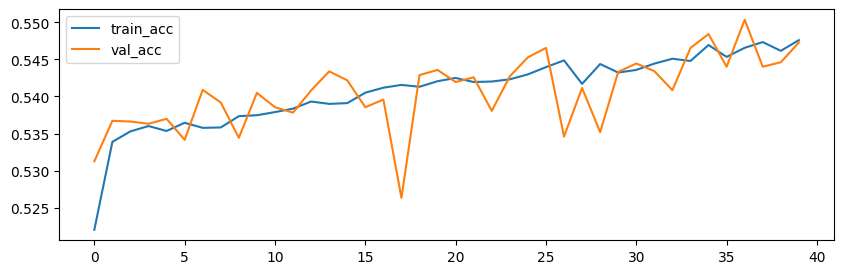

In [ ]:
# 모델 복잡도 곡선 그리기
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 3))
plt.plot(his_simple.history["accuracy"], label = "train_acc")
plt.plot(his_simple.history["val_accuracy"], label = "val_acc")
plt.legend()
plt.show()

### RNN의 경우, 시퀀스 길이가 길수록 효과적으로 학습하기가 어려움
- 타임스텝이 길어질 수록 초반에 입력된 요소의 정보가 소실되는 문제가 발생 → 장기 의존성 문제
- 우리의 문제같은 경우, 감정을 확정 짓는 단어가 후반 예측에 영향을 주지 못함.

### LSTM (Long Short Term Memory)
- RNN의 고질적인 문제를 해결하기 위해, 장기기억(CS)과 단기기억(HS)을 관리하는 계산이 추가된 LSTM 등장.
- 기존 RNN 구조에서 메모리 셀(Cell) 개념이 추가
- GRU 레이어 : LSTM이랑 성능은 비슷, 연산량을 줄인 버전(게이트가 2개로 관리)
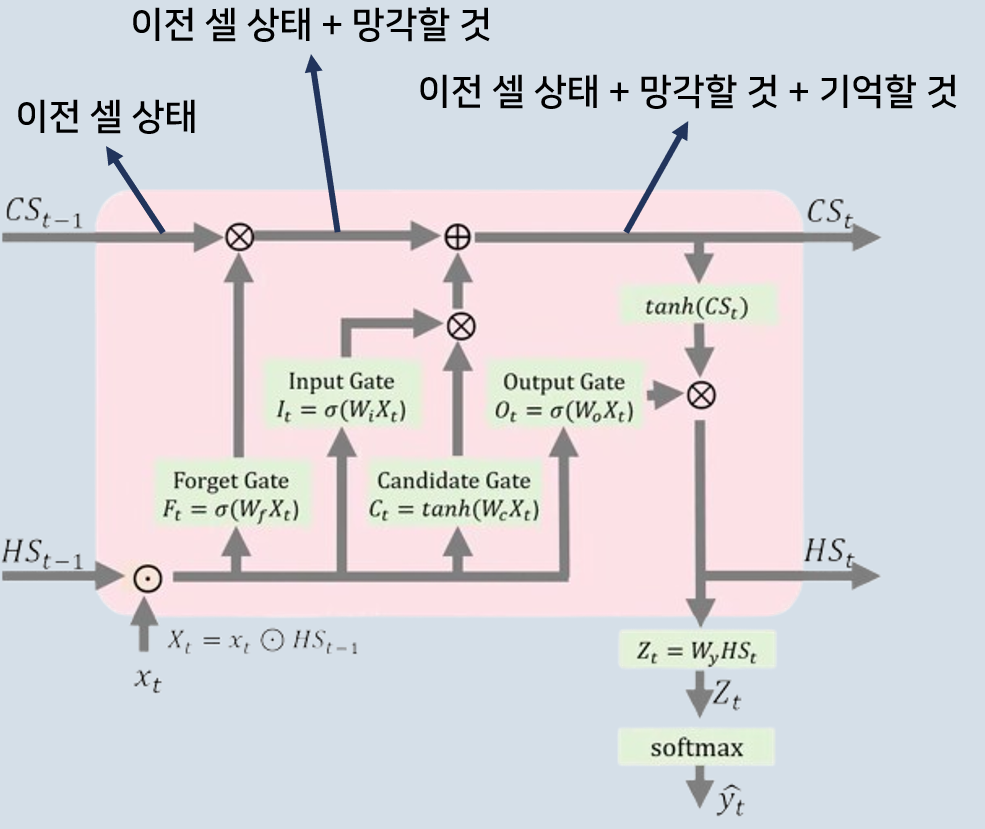
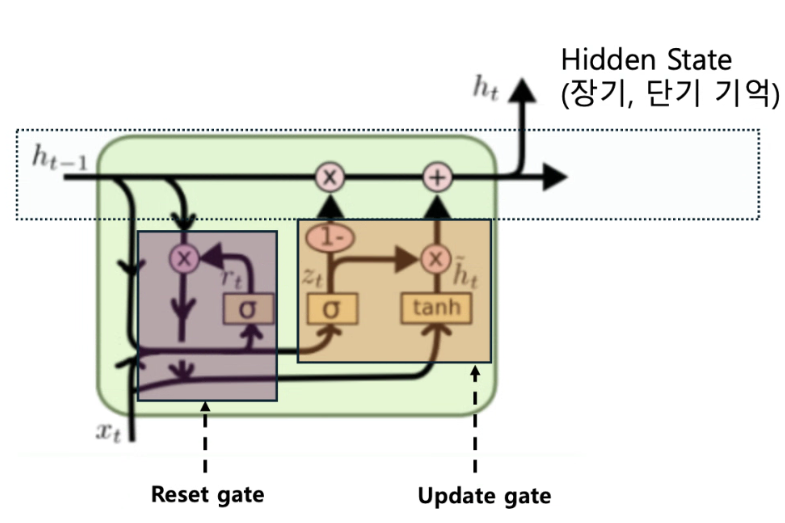

In [ ]:
from tensorflow.keras.layers import LSTM
# from tensorflow.keras.layers import LSTM

In [ ]:
# 1. 신경망 구조 설계
LSTM_model = Sequential()
LSTM_model.add(InputLayer(shape = X_train[0].shape))
LSTM_model.add(LSTM(64))
LSTM_model.add(Dense(1, activation = "sigmoid"))

# 2. 학습 방법 설정
LSTM_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# 3. 학습
his_LSTM = LSTM_model.fit(X_train, y_train, validation_split = 0.2, epochs = 40, batch_size = 128)

Epoch 1/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5421 - loss: 0.6881 - val_accuracy: 0.5610 - val_loss: 0.6772
Epoch 2/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5655 - loss: 0.6767 - val_accuracy: 0.5620 - val_loss: 0.6787
Epoch 3/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5673 - loss: 0.6745 - val_accuracy: 0.5698 - val_loss: 0.6698
Epoch 4/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5697 - loss: 0.6702 - val_accuracy: 0.5744 - val_loss: 0.6669
Epoch 5/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5746 - loss: 0.6664 - val_accuracy: 0.5753 - val_loss: 0.6658
Epoch 6/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5776 - loss: 0.6625 - val_accuracy: 0.5683 - val_loss: 0.6681
Epoch 7/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5787 - loss: 0.6625 - val_accuracy: 0.5807 - val_loss: 0.6623
Epoch 8/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5848 - loss: 0.6599 - val_accuracy: 0.

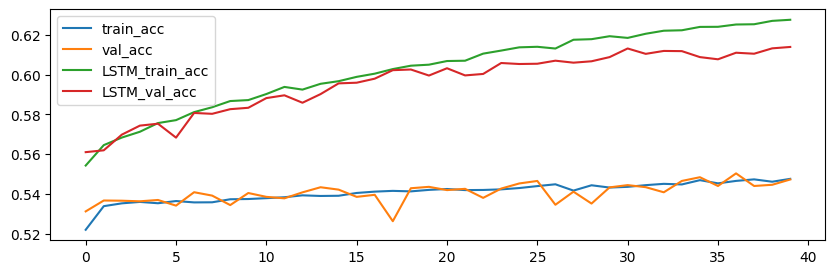

In [ ]:
plt.figure(figsize = (10, 3))
plt.plot(his_simple.history["accuracy"], label = "train_acc")
plt.plot(his_simple.history["val_accuracy"], label = "val_acc")
plt.plot(his_LSTM.history["accuracy"], label = "LSTM_train_acc")
plt.plot(his_LSTM.history["val_accuracy"], label = "LSTM_val_acc")
plt.legend()
plt.show()

# RNN보다는 LSTM의 성능이 훨씬 더 나아짐 → 장기 의존성 문제를 완화.
# 그럼에도 불구하고 성능이 뛰어나지 못함 → 벡터화에 문제.

# 현재 라벨인코딩 기반의 수치화는 단어의 빈도 패턴을 학습하는 것과 비슷
# 일반적인 인코딩이나, 빈도 기반의 수치화(BOW, TFIDF 등)는 문맥을 담아내기 어려움.
# 임베딩 필요. → 워드임베딩, 문서임베딩, 딥러닝 기반 임베딩 등